# Splitting Descent

In [1]:
import torch
from sandbox import SimpleModel, toy_data, experiment_series, eval_series
from pathlib import Path

In [2]:
model_params = (1, 1, 8, 2, 2)

num_kept_neurons = 2
lr=0.005
runs=50

#0: loss: 0.0346260704100132 - size: 649
#1: loss: 0.1925155520439148 - size: 649
#2: loss: 0.19247594475746155 - size: 649
#3: loss: 0.03274039924144745 - size: 649
#4: loss: 0.19228343665599823 - size: 649
#5: loss: 0.33624809980392456 - size: 649
#6: loss: 0.1992490440607071 - size: 649
#7: loss: 0.1951836198568344 - size: 649
#8: loss: 0.05715511739253998 - size: 649
#9: loss: 0.03614471107721329 - size: 649
#10: loss: 0.19086113572120667 - size: 649
#11: loss: 0.03532459959387779 - size: 649
#12: loss: 0.03179103508591652 - size: 649
#13: loss: 0.03432305157184601 - size: 649
#14: loss: 0.1969873607158661 - size: 649
#15: loss: 0.04338648170232773 - size: 649
#16: loss: 0.03470219671726227 - size: 649
#17: loss: 0.19636449217796326 - size: 649
#18: loss: 0.0449344776570797 - size: 649
#19: loss: 0.034327443689107895 - size: 649
#20: loss: 0.06331723928451538 - size: 649
#21: loss: 0.19386722147464752 - size: 649
#22: loss: 0.034333642572164536 - size: 649
#23: loss: 0.103618107736

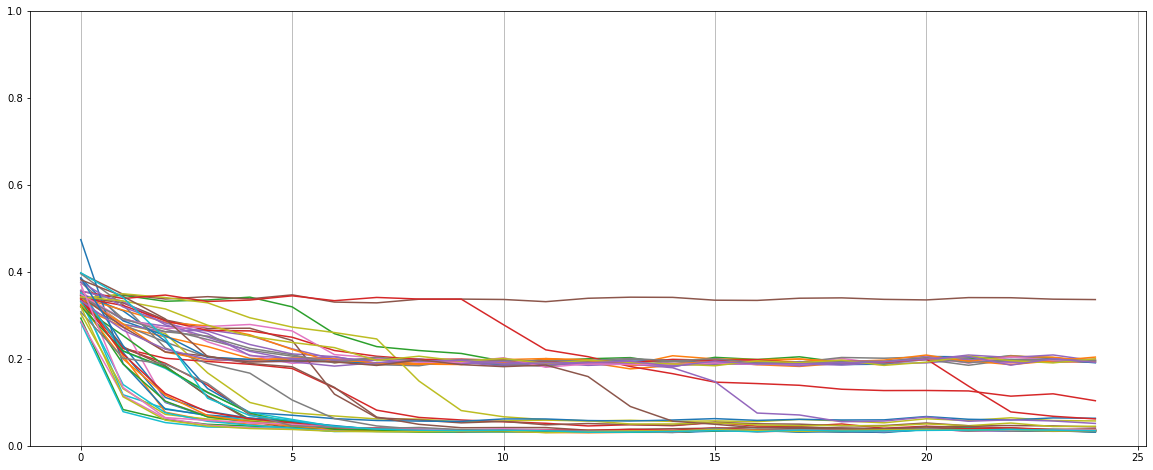

In [3]:
def grow(model):
    model.grow(num_novel=4)
    model.tune_direction()
    model.tune_new_neurons()
    selected = [torch.arange(m.hidden_features) for m in (model.a, model.b)]
    model.degrow(*selected)

series = experiment_series(model_params, runs=runs, grow=grow, lr=lr)

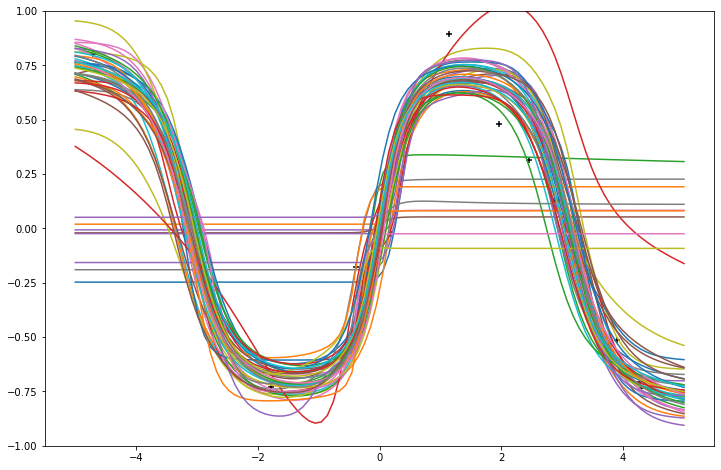

In [4]:
eval_series(series)

In [5]:
d = Path("results")
d.mkdir(parents=True, exist_ok=True)

torch.save(series, d / 'splitting_growth_tuned.pt')